In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)

In [2]:
# Load NHANES for ML
fpath = "Data/NHANES_Diet_Diabetes_Risk.xls.csv"
df = pd.read_csv(fpath)
df = df.set_index("SEQN")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 73557 to 83729
Columns: 168 entries, WTDRD1 to Diabetes_Risk
dtypes: float64(166), int64(2)
memory usage: 8.6 MB


,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V,Diabetes_Risk
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,16888.32786,12930.89065,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209.0,3.92,0.0,70.0,110.0,60.0,304.0,278.0,1398.0,430.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
73558,17932.14387,12684.14887,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584.0,20.94,0.0,1477.0,1488.0,0.0,145.0,12.0,0.0,899.0,...,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2
73559,59641.81293,39394.23671,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88.0,8.87,0.0,616.0,655.0,21.0,449.0,35.0,515.0,300.0,...,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
73561,59052.35703,39004.89299,1,63.0,2.0,2.0,18.0,1.0,1.0,1.0,13.0,4.0,NaN,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,7.0,1421.0,55.24,178.20,87.78,12.3,55.36,4.479,26.216,1.263,41.0,53.17,0.0,738.0,863.0,0.0,1476.0,0.0,0.0,0.0,...,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,0
73562,49890.82866,0.00000,1,49.0,2.0,1.0,11.0,3.0,1.0,1.0,13.0,1.0,3.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1785.0,55.11,189.59,81.75,22.6,93.92,22.155,40.013,23.550,534.0,12.30,0.0,272.0,355.0,172.0,776.0,300.0,2339.0,2101.0,...,2.0,NaN,2.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,0


In [4]:
# list of cols to drop

X = df.drop(columns = ['Diabetes_Risk'])
y = df['Diabetes_Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78727,70710.30601,46705.128430,1,59.0,2.0,2.0,1.0,7.0,1.0,1.0,13.0,4.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1339.0,50.73,211.40,77.68,15.8,34.75,11.780,10.515,8.776,63.0,2.54,0.0,246.0,294.0,164.0,509.0,7.0,303.0,827.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,1.0,5.0,2.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
82233,60907.62017,88806.191190,1,25.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,3.0,3.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,858.0,45.09,105.41,16.39,5.7,27.83,9.012,9.554,6.515,253.0,1.96,0.0,226.0,233.0,0.0,97.0,5.0,448.0,424.0,...,4.0,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,4.0,2.0,NaN,2.0
74032,46703.93997,173276.611500,1,2.0,2.0,2.0,3.0,1.0,1.0,1.0,13.0,4.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1356.0,59.90,167.90,115.17,5.2,50.45,23.208,15.741,4.577,166.0,1.83,0.0,249.0,266.0,39.0,181.0,16.0,1809.0,83.0,...,1.0,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79069,10390.35346,8097.175852,1,2.0,2.0,2.0,11.0,7.0,1.0,1.0,13.0,4.0,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1797.0,98.61,204.13,62.15,25.1,71.02,13.122,24.368,25.394,243.0,10.95,0.0,456.0,532.0,265.0,751.0,67.0,4285.0,927.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77717,48746.26378,180853.851200,1,25.0,2.0,2.0,20.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,4299.0,138.95,559.97,299.94,27.8,174.33,65.027,59.996,27.510,276.0,15.81,0.0,606.0,737.0,18.0,1509.0,21.0,31209.0,928.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

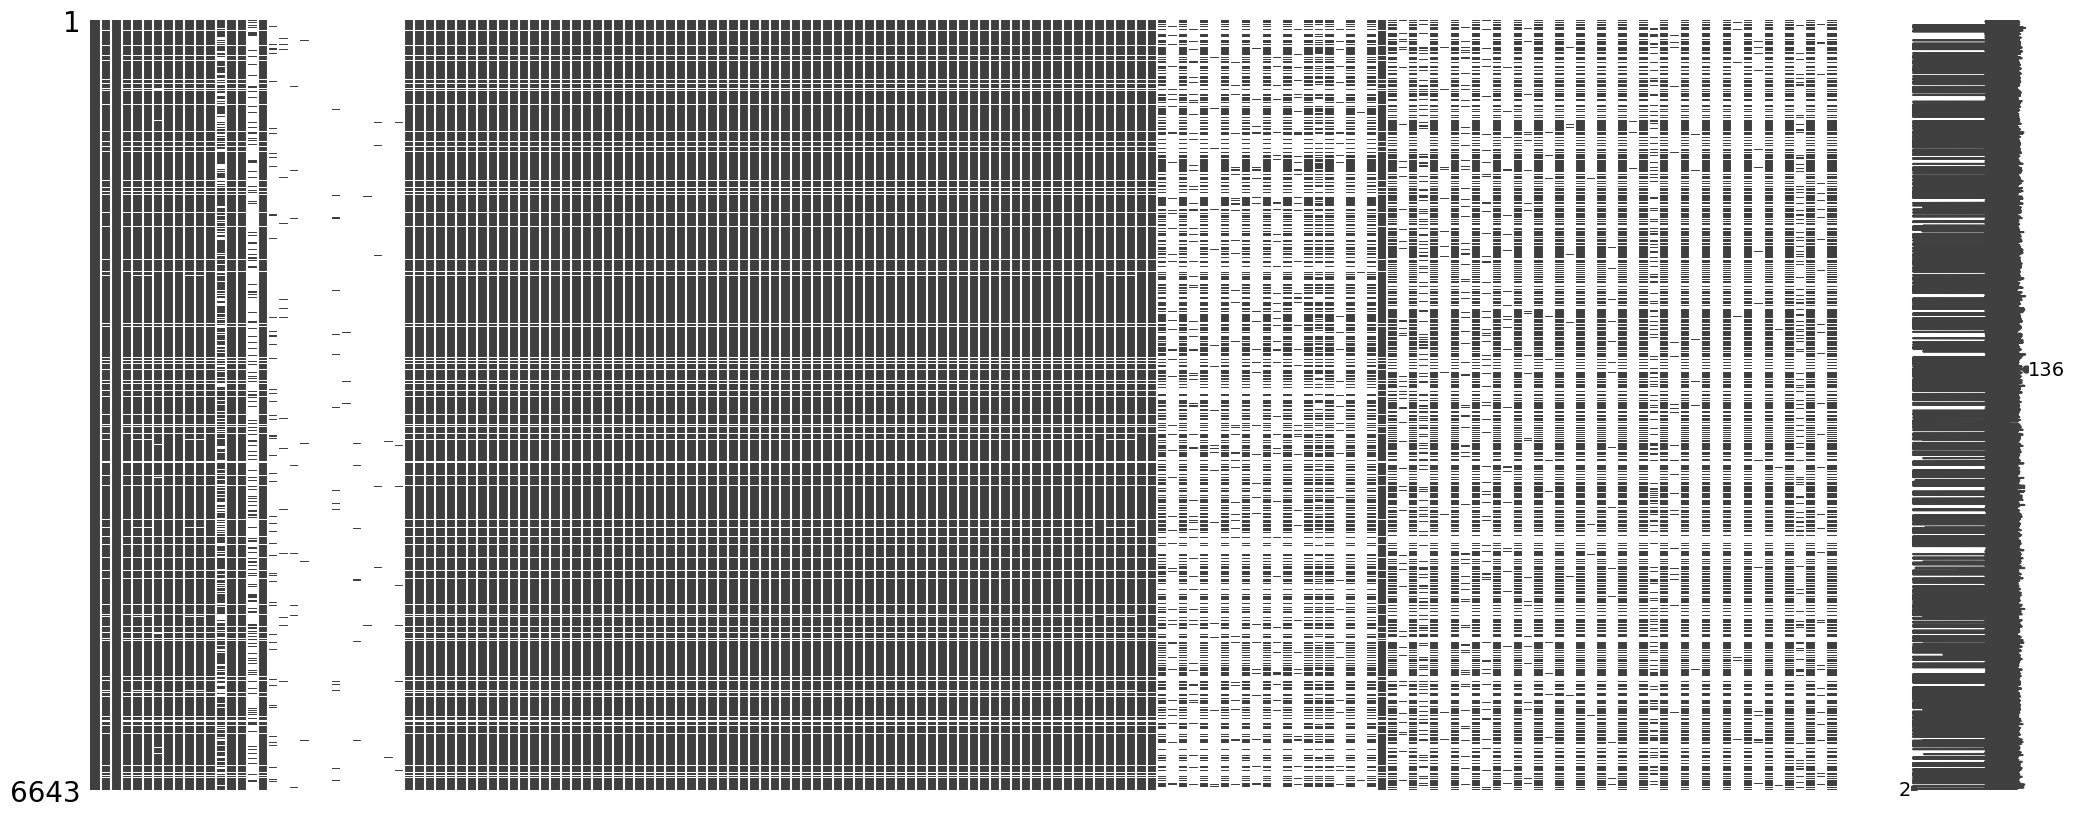

In [5]:
import missingno as msno
msno.matrix(X)

In [6]:
## PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=167)


In [13]:
# Create the Column Transformer
col_transformer = ColumnTransformer([num_tuple], 
                                verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=167))],
                  verbose_feature_names_out=False)

In [14]:
# fit the column transformer on X_train
col_transformer.fit(X_train)
# Transform X_train and X_test
X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)
X_train_tf.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,...,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78727,0.828246,0.121669,-0.295989,0.759244,0.0,0.338808,-1.340234,1.195759,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.165331,0.189828,-0.046713,-1.392493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929421,-0.758725,-0.672011,-0.332717,-0.434149,-0.060394,-0.974490,-0.868066,-0.995841,-0.768236,-0.944910,-0.784441,-0.182283,-0.397301,-0.527561,-0.157457,-0.349554,-0.191218,-0.523296,-0.174656,-0.295260,...,-0.097381,0.173753,-0.087421,0.049137,-0.027836,0.0,-0.473916,0.265908,-0.138889,-1.830599,2.224798,0.118509,-0.059742,0.329903,-0.012884,-3.540910,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,0.408678,-0.101500,0.203975,-0.030765,0.0
82233,0.579175,0.890047,-0.295989,-0.965540,0.0,0.338808,-1.429137,0.240609,-0.256418,-0.073655,0.079215,-0.035916,1.737711,-1.812684,-1.192806,0.433627,0.145392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587796,-1.251760,-0.800935,-1.194710,-1.250417,-1.052084,-1.124673,-1.042537,-1.051694,-0.942262,-0.127315,-0.858855,-0.182283,-0.448869,-0.637360,-0.301731,-0.449779,-0.196408,-0.504781,-0.288864,1.562895,...,1.288762,0.173753,-0.087421,0.049137,-0.027836,0.0,-0.473916,0.265908,-0.138889,-1.830599,0.669048,0.118509,-0.059742,0.329903,-0.012884,0.282413,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,-2.446912,1.714198,0.203975,-0.030765,0.0
74032,0.218283,2.431698,-0.295989,-2.132305,0.0,0.338808,-1.162428,-1.669691,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.165331,0.189828,-0.046713,-1.392493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587796,-0.741300,-0.462396,-0.686493,0.065147,-1.101178,-0.633755,-0.147745,-0.692104,-1.091427,-0.501687,-0.875534,-0.182283,-0.389566,-0.577960,-0.267422,-0.429345,-0.167867,-0.330998,-0.385502,-1.128112,...,-0.790452,0.173753,-0.087421,0.049137,-0.027836,0.0,0.777302,0.265908,-0.138889,0.546269,-0.108828,0.118509,-0.059742,0.329903,-0.012884,0.282413,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,0.408678,-0.101500,0.203975,-0.030765,0.0
79069,-0.704387,-0.582956,-0.295989,-2.132305,0.0,0.338808,-0.451206,1.195759,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.989007,0.189828,-0.046713,0.145392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.592262,-0.289266,0.422469,-0.391842,-0.640980,0.852746,-0.187328,-0.783478,-0.190701,0.510826,-0.170346,0.294560,-0.182283,0.144158,-0.099162,-0.068606,-0.290684,-0.035542,-0.014842,-0.146317,1.192370,.

In [15]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_X_train = scaler.fit_transform(X_train_tf)
scaled_X_test = scaler.transform(X_test_tf)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate default KNN
knn = KNeighborsClassifier()



In [9]:
# Custom Functions
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



In [23]:
# Define KNN model pipeline
knn_pipe = make_pipeline(col_transformer, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=167))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      4085
           1       0.49      0.04      0.08       437
           2       0.68      0.04      0.08       460

    accuracy                           0.82      4982
   macro avg       0.66      0.36      0.35      4982
weighted avg       0.78      0.82      0.75      4982



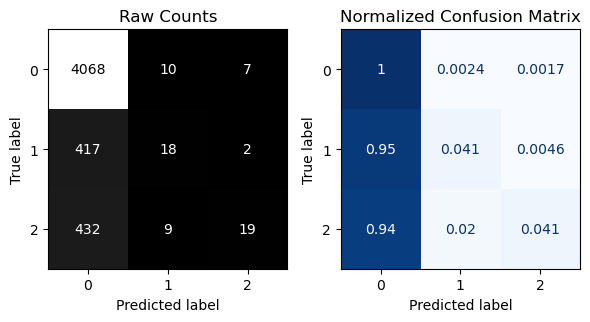


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1367
           1       0.25      0.03      0.05       150
           2       0.27      0.02      0.04       144

    accuracy                           0.82      1661
   macro avg       0.45      0.35      0.33      1661
weighted avg       0.73      0.82      0.75      1661



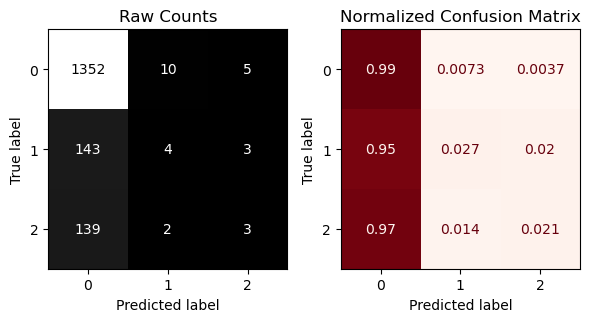

In [24]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)


In [39]:
# Record the time it takes to make predictions
%%time
preds = knn.predict(X_test_tf)

UsageError: Line magic function `%%time` not found.


In [26]:
# Instantiate PCA to make 3 principal components
pca = PCA(n_components=3)
# Create and define the principal components
PCA_X_train = pca.fit_transform(scaled_X_train)
PCA_X_test = pca.transform(scaled_X_test)
# Preview the results
PCA_X_train.head()

,pca0,pca1,pca2
SEQN,,,
78727,-3.649680,0.764669,1.710137
82233,-4.499968,2.255762,0.198826
74032,-3.733771,-1.710416,-0.506858
79069,-0.064294,0.614010,1.376698
77717,8.389199,-3.711517,-1.582496


In [27]:
PCA_X_test.head()

,pca0,pca1,pca2
SEQN,,,
82685,-4.219341,4.380995,-3.244616
76243,0.555933,-0.454669,0.436559
78404,1.298226,1.167991,2.715039
74401,-7.995960,-0.587756,-0.992159
81364,-1.006061,-0.412939,0.309893


In [28]:
# Sum of variance explained by 3 principal components
pca.explained_variance_ratio_.sum()

0.23303541320271673

In [40]:
#Fit PCA on transformer to KNN
col_transformer.fit(X_train)
# Transform X_train and X_test
X_train_pca = col_transformer.transform(X_train)
X_test_pca = col_transformer.transform(X_test)
X_train_tf.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,...,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78727,0.828246,0.121669,-0.295989,0.759244,0.0,0.338808,-1.340234,1.195759,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.165331,0.189828,-0.046713,-1.392493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929421,-0.758725,-0.672011,-0.332717,-0.434149,-0.060394,-0.974490,-0.868066,-0.995841,-0.768236,-0.944910,-0.784441,-0.182283,-0.397301,-0.527561,-0.157457,-0.349554,-0.191218,-0.523296,-0.174656,-0.295260,...,-0.097381,0.173753,-0.087421,0.049137,-0.027836,0.0,-0.473916,0.265908,-0.138889,-1.830599,2.224798,0.118509,-0.059742,0.329903,-0.012884,-3.540910,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,0.408678,-0.101500,0.203975,-0.030765,0.0
82233,0.579175,0.890047,-0.295989,-0.965540,0.0,0.338808,-1.429137,0.240609,-0.256418,-0.073655,0.079215,-0.035916,1.737711,-1.812684,-1.192806,0.433627,0.145392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587796,-1.251760,-0.800935,-1.194710,-1.250417,-1.052084,-1.124673,-1.042537,-1.051694,-0.942262,-0.127315,-0.858855,-0.182283,-0.448869,-0.637360,-0.301731,-0.449779,-0.196408,-0.504781,-0.288864,1.562895,...,1.288762,0.173753,-0.087421,0.049137,-0.027836,0.0,-0.473916,0.265908,-0.138889,-1.830599,0.669048,0.118509,-0.059742,0.329903,-0.012884,0.282413,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,-2.446912,1.714198,0.203975,-0.030765,0.0
74032,0.218283,2.431698,-0.295989,-2.132305,0.0,0.338808,-1.162428,-1.669691,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.165331,0.189828,-0.046713,-1.392493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587796,-0.741300,-0.462396,-0.686493,0.065147,-1.101178,-0.633755,-0.147745,-0.692104,-1.091427,-0.501687,-0.875534,-0.182283,-0.389566,-0.577960,-0.267422,-0.429345,-0.167867,-0.330998,-0.385502,-1.128112,...,-0.790452,0.173753,-0.087421,0.049137,-0.027836,0.0,0.777302,0.265908,-0.138889,0.546269,-0.108828,0.118509,-0.059742,0.329903,-0.012884,0.282413,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,0.408678,-0.101500,0.203975,-0.030765,0.0
79069,-0.704387,-0.582956,-0.295989,-2.132305,0.0,0.338808,-0.451206,1.195759,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.989007,0.189828,-0.046713,0.145392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.592262,-0.289266,0.422469,-0.391842,-0.640980,0.852746,-0.187328,-0.783478,-0.190701,0.510826,-0.170346,0.294560,-0.182283,0.144158,-0.099162,-0.068606,-0.290684,-0.035542,-0.014842,-0.146317,1.192370,.

In [41]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_X_train = scaler.fit_transform(X_train_pca)
scaled_X_test = scaler.transform(X_test_pca)

In [ ]:
# Define KNN model pipeline
knn_pca = make_pipeline(col_transformer, knn)
# Fit the model on the training data
knn_pca.fit(X_train, y_train)
